In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
raw_data = Path('/Volumes/krauss/Lisa/GMR/Array/SpecialBox/Cuthbert/250709/results/communicating_results.csv')

In [3]:
df = pd.read_csv(raw_data)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
df.head()

,ROI-label,Analysis-method,amplitude,mu,sigma,offset,error
timestamp,,,,,,,
2025-07-09 14:31:25.475665,016A_N,gaussian,133.305,130.866,49.042,-4.829,7.883
2025-07-09 14:31:25.475665,016A_S,gaussian,121.023,114.988,37.117,-1.692,7.891
2025-07-09 14:31:25.475665,036A_N,gaussian,110.222,111.879,30.962,-1.076,6.872
2025-07-09 14:31:25.475665,036A_S,gaussian,104.545,94.692,39.453,-1.732,8.001
2025-07-09 14:31:25.475665,056A_N,gaussian,96.125,119.246,30.480,-1.353,5.684


In [4]:
rois = df["ROI-label"].unique()
rois = list(set([roi[:-2] for roi in rois]))
print(rois)

['116A', '056B', '156B', '096A', '096B', '136A', '136B', '196B', '016A', '116B', '076B', '036A', '156A', '016B', '076A', '056A', '036B', '176A', '176B', '196A']


In [5]:
comb_df = pd.DataFrame()
suffix = ['_N', '_S']

for roi in rois:
    df_N = df[df["ROI-label"] == f"{roi}{suffix[0]}"]["mu"]
    df_S = df[df["ROI-label"] == f"{roi}{suffix[1]}"]["mu"]
    comb_df[roi] = df_N + df_S
comb_df.head()

,116A,056B,156B,096A,096B,136A,136B,196B,016A,116B,076B,036A,156A,016B,076A,056A,036B,176A,176B,196A
timestamp,,,,,,,,,,,,,,,,,,,,
2025-07-09 14:31:25.475665,247.465,113.849,90.941,232.143,81.668,229.038,101.703,78.496,245.854,102.596,76.671,206.571,241.834,97.166,199.837,232.446,98.124,207.868,89.407,168.895
2025-07-09 14:31:46.595359,244.420,113.820,91.586,228.477,79.728,229.878,102.418,81.602,245.655,102.756,76.108,208.492,239.218,94.182,203.016,232.839,95.997,207.036,88.657,166.869
2025-07-09 14:32:05.460268,245.373,113.253,90.028,228.117,80.943,228.366,102.358,75.590,246.232,101.249,75.785,209.667,241.181,95.501,201.062,234.001,96.465,207.796,89.838,168.241
2025-07-09 14:32:24.220224,245.945,112.697,90.984,229.592,81.801,232.124,102.060,77.290,245.487,103.846,76.311,207.570,238.283,94.902,200.255,230.652,97.607,209.281,89.148,171.238
2025-07-09 14:32:43.039956,243.847,110.463,89.690,229.939,80.301,232.918,103.189,82.043,246.719,102.435,77.156,207.697,242.812,96.763,201.625,232.849,97.415,208.284,88.166,169.313


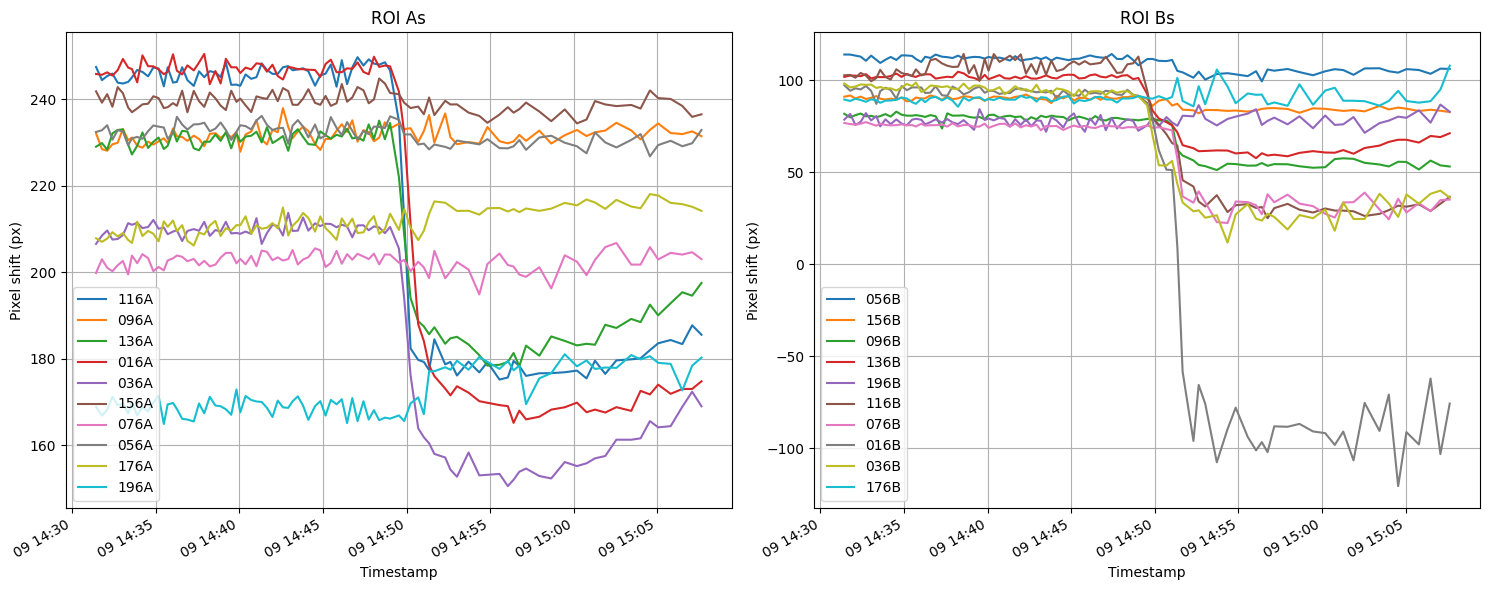

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

comb_df.loc[:, comb_df.columns.str.contains('A')].plot(
    kind='line',
    ax=ax[0],
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

comb_df.loc[:, comb_df.columns.str.contains('B')].plot(
    kind='line',
    ax=ax[1],
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

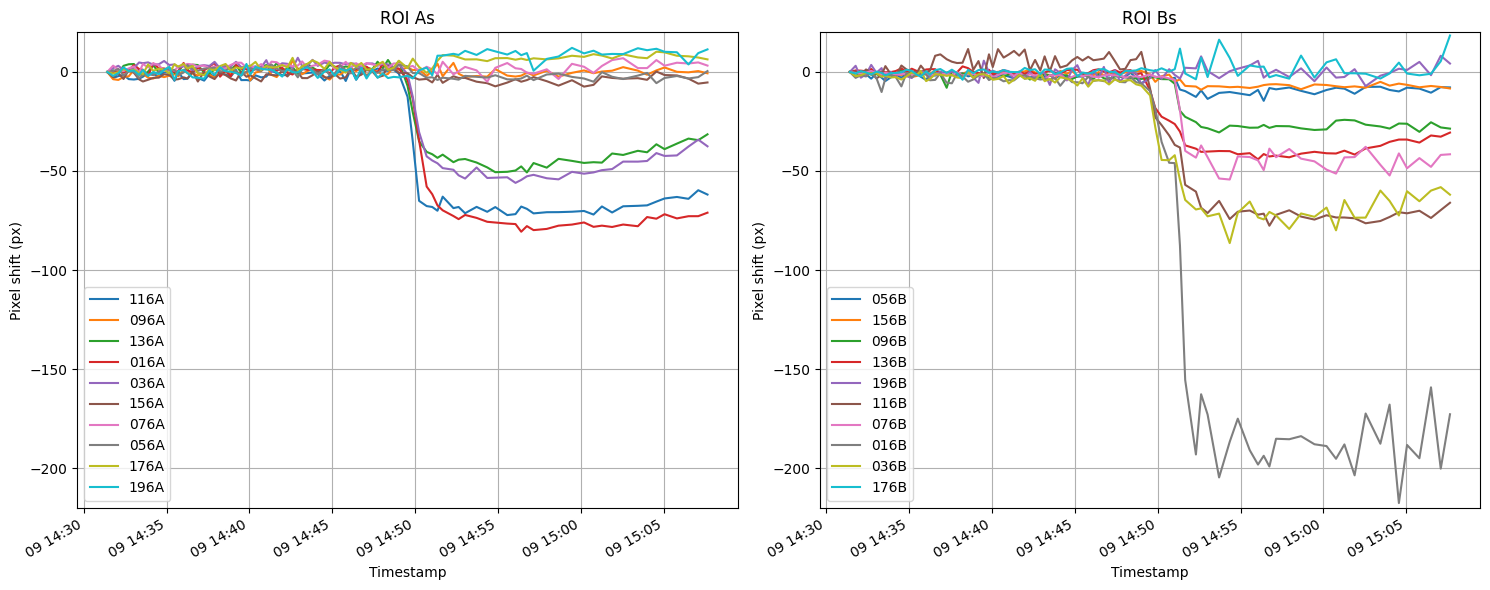

In [14]:
normalized_df = comb_df - comb_df.iloc[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

normalized_df.loc[:, normalized_df.columns.str.contains('A')].plot(
    kind='line',
    ylim=(-220, 20),
    ax=ax[0],
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

normalized_df.loc[:, normalized_df.columns.str.contains('B')].plot(
    kind='line',
    ylim=(-220, 20),
    ax=ax[1],
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

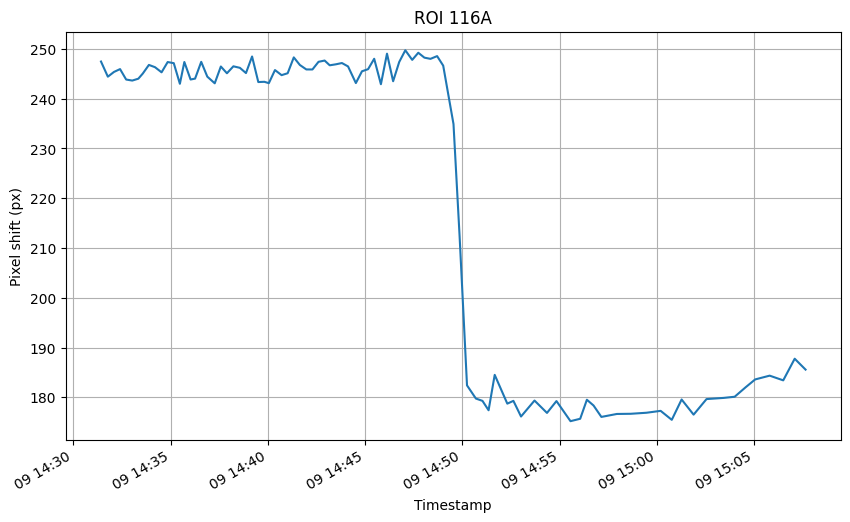

In [16]:
label = "116A"

comb_df[label].plot(
    kind='line',
    figsize=(10, 6),
    title=f'ROI {label}',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

plt.grid(True) # Add a grid for better readability
plt.show()